# Random Forest Project

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor we would want to invest in people who showed a profile of having a high probability of paying back. We will try to create a model that will help predict this.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

# Get the data

In [70]:
df = pd.read_csv('loan_data.csv')

In [71]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [23]:
# we will be predicting 'not.fully.paid' column 

# Exploratory Data Analysis
Let's do some data visualization! 

In [24]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


Text(0.5, 0, 'FICO')

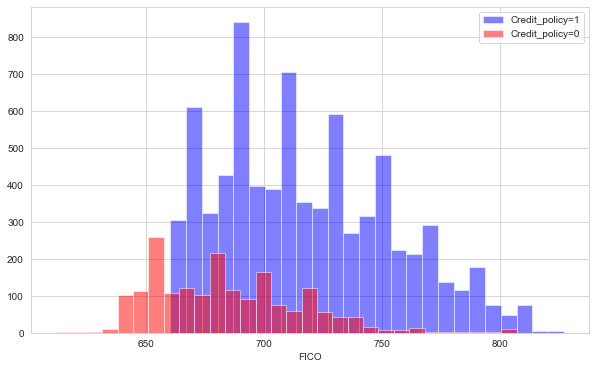

In [28]:
plt.figure(figsize=(10,6))

df[df['credit.policy']==1]['fico'].hist(alpha=0.5,bins=30,color='blue',label='Credit_policy=1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,bins=30,color='red',label='Credit_policy=0')

plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'Not Fully Paid')

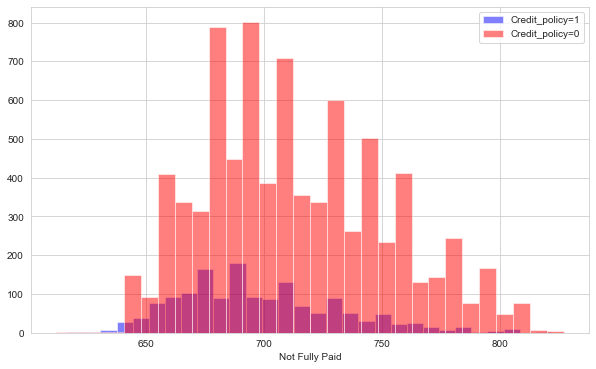

In [27]:
plt.figure(figsize=(10,6))

df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,bins=30,color='blue',label='Credit_policy=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,bins=30,color='red',label='Credit_policy=0')

plt.legend()
plt.xlabel('Not Fully Paid')

<AxesSubplot:xlabel='purpose', ylabel='count'>

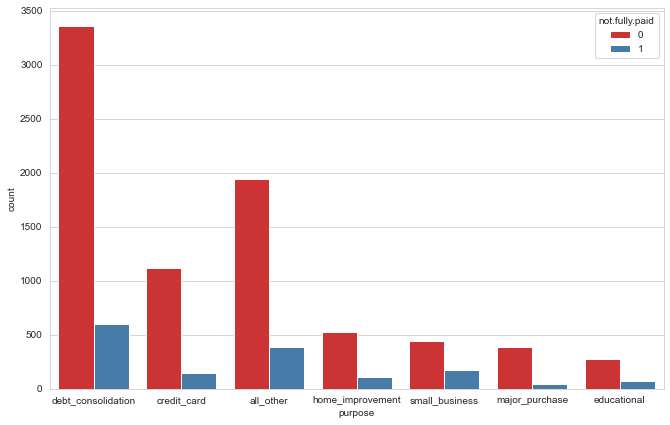

In [33]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',data=df,hue='not.fully.paid',palette='Set1')

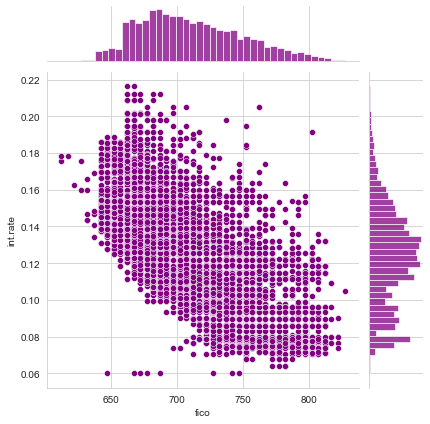

In [36]:
sns.jointplot(x='fico',y='int.rate',data=df,color='purple')

<Figure size 792x504 with 0 Axes>

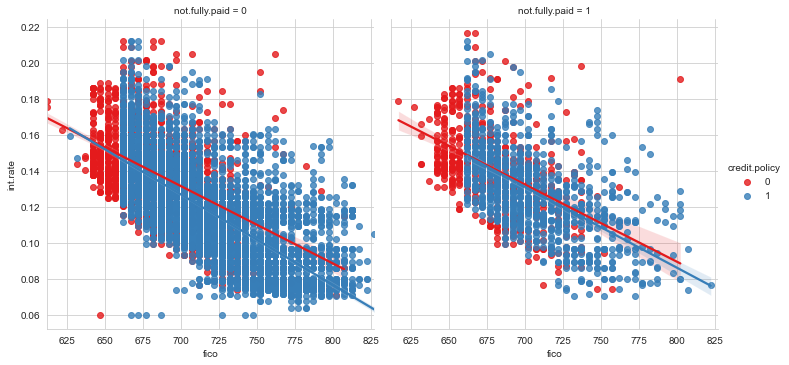

In [42]:
plt.figure(figsize=(11,7))
sns.lmplot(x='fico',y='int.rate',data=df,hue='credit.policy',col='not.fully.paid',palette='Set1')

# Setting up the Data
Let's get ready to set up our data for our Random Forest Classification Model!

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credit.policy       9578 non-null   int64  
 1   purpose             9578 non-null   object 
 2   int.rate            9578 non-null   float64
 3   installment         9578 non-null   float64
 4   log.annual.inc      9578 non-null   float64
 5   dti                 9578 non-null   float64
 6   fico                9578 non-null   int64  
 7   days.with.cr.line   9578 non-null   float64
 8   revol.bal           9578 non-null   int64  
 9   revol.util          9578 non-null   float64
 10  inq.last.6mths      9578 non-null   int64  
 11  delinq.2yrs         9578 non-null   int64  
 12  pub.rec             9578 non-null   int64  
 13  not.fully.paid      9578 non-null   int64  
 14  credit_card         9578 non-null   uint8  
 15  debt_consolidation  9578 non-null   uint8  
 16  educat

# Categorical Features
Notice that the purpose column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.# Categorical Features
Notice that the purpose column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

In [72]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [73]:
to_drop = ['purpose']

In [74]:
df_final = pd.get_dummies(df,columns=to_drop,drop_first=True)

In [75]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [76]:
df_final.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


# TRAIN TEST SPLIT

In [83]:
X = df_final.drop('not.fully.paid',axis=1)
y = df_final['not.fully.paid']

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [86]:
from sklearn.tree import DecisionTreeClassifier

In [87]:
dtree = DecisionTreeClassifier()

In [88]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

# Predictions and Evaluation of Decision Tree

In [89]:
pred = dtree.predict(X_test)

In [90]:
from sklearn.metrics import classification_report,confusion_matrix

In [92]:
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.24      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



[[1990  441]
 [ 338  105]]


# Training the Random Forest model

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rforest = RandomForestClassifier(n_estimators=600)

In [95]:
rforest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

# Predictions and Evaluation


In [97]:
pred1 = rforest.predict(X_test)

In [99]:
from sklearn.metrics import classification_report,confusion_matrix

In [101]:
print(classification_report(y_test,pred1))
print('\n')
print(confusion_matrix(y_test,pred1))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.57      0.02      0.04       443

    accuracy                           0.85      2874
   macro avg       0.71      0.51      0.48      2874
weighted avg       0.81      0.85      0.78      2874



[[2425    6]
 [ 435    8]]


# We can see that accuracy out of Random Forest method is higher than that of Decision Tree Method.

Bigger the datasets get better performace will be obtained by Random Forest method